# 成年人死亡率预测

<br>
<hr>

## 1. 实验介绍

### 1.1 实验背景

成年人死亡率指的是每一千人中15岁至60岁死亡的概率（数学期望）。这里我们给出了世界卫生组织（WHO）下属的全球卫生观察站（GHO）数据存储库跟踪的所有国家健康状况以及许多其他相关因素。要求利用训练数据建立回归模型，并预测成年人死亡率（**Adult Mortality**）。

### 1.2 实验要求

1. 训练数据包含`2336`条记录和`22`个字段，对训练数据进行一定的可视化数据分析（章节2.2）
2. 利用训练数据，选择合适的信息作为特征建立回归模型，并预测测试数据成年人死亡率
3. 利用`MO`平台进行模型性能评估

### 1.3 实验环境
可以使用基于 Python 的 `Pandas` 库进行数据相关处理，使用 `Sklearn` 库进行相关模型构建。


### 1.4 注意事项
1. 推荐使用基于 Python 的`Sklearn`库进行相关实验
2. 数据中可能会有一些字段的值存在缺失

## 2. 实验部分

### 2.1 导入相关包

In [1]:
import pandas as pd
import sklearn
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib


### 2.2 数据读取和可视化分析

In [2]:
# 读取数据集
train_data = pd.read_csv('./data/train_data.csv')


In [3]:
train_data


Country  Year      Status  Life expectancy   \
0                           Seychelles  2000  Developing              71.8   
1                            Swaziland  2000  Developing              48.4   
2                                 Togo  2000  Developing              54.6   
3             United States of America  2000   Developed              76.8   
4                               Panama  2000  Developing              75.7   
...                                ...   ...         ...               ...   
2331  Micronesia (Federated States of)  2015  Developing              69.4   
2332                            Brazil  2015  Developing              75.0   
2333                           Morocco  2015  Developing              74.3   
2334                            Greece  2015  Developing              81.0   
2335                       Timor-Leste  2015  Developing              68.3   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                 0     8.24              601.760812         98.0         0   
1                 3     7.19               25.216833         83.0        10   
2                14     1.10                2.029644          NaN      3578   
3                28     8.21                0.000000          9.0        85   
4                 2     5.58                9.871021          NaN         0   
...             ...      ...                     ...          ...       ...   
2331              0      NaN                0.000000         78.0         0   
2332             42      NaN                0.000000         96.0       214   
2333             17      NaN                0.000000         99.0        17   
2334              0      NaN                0.000000         96.0         1   
2335              2      NaN                0.000000         76.0        43   

       BMI   ...  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
0      27.1  ...               4.62         98.0        0.1  7578.851530   
1      25.9  ...               5.26         84.0       46.4  1637.456700   
2      16.6  ...               4.35         64.0        5.1    26.393293   
3       6.1  ...              13.70         94.0        0.1          NaN   
4      45.9  ...               7.76         98.0        0.2    46.299350   
...     ...  ...                ...          ...        ...          ...   
2331   69.4  ...                NaN         72.0        0.1          NaN   
2332   56.1  ...                NaN         96.0        0.1  8757.262200   
2333   58.5  ...                NaN         99.0        0.1  2847.285569   
2334   66.5  ...                NaN         99.0        0.1   187.789910   
2335   17.4  ...                NaN         76.0        0.1  1161.769350   

      Population   thinness  1-19 years   thinness 5-9 years  \
0        81131.0                    6.3                  6.7   
1       161468.0                    9.4                  9.6   
2       497367.0                    9.4                  9.3   
3            NaN                    0.8                  0.7   
4        33347.0                    2.4                  2.3   
...          ...                    ...                  ...   
2331         NaN                    0.2                  0.2   
2332   2596218.0                    2.7                  2.6   
2333   3483322.0                    6.4                  6.2   
2334    182883.0                    0.8                  0.7   
2335    124977.0                    1.9                 11.1   

      Income composition of resources  Schooling  Adult Mortality  
0                               0.000       12.3              188  
1                               0.516        9.4              536  
2                               0.425        9.3              339  
3                                 NaN        NaN              114  
4                               0.716       12.1              121  
...                               ...        ...       

可以看到训练数据包含2336条记录和22个字段，每个字段含义说明如下：
1. Country：国家
2. Year：年份
3. Status：发达国家或发展中国家
4. Life expectancy：预期寿命
5. Infant deaths：每千人口中的婴儿死亡人数
6. Alcohol：人均酒精消费量（以升纯酒精为单位）
7. percentage expenditure：卫生支出占人均国内生产总值的百分比
8. Hepatitis B：一岁儿童乙型肝炎免疫疫苗接种率
9. Measles：麻疹每1000人报告的病例数
10. BMI：所有人群平均BMI指数
11. under-five deaths：每千人口中五岁以下死亡人数
12. Polio：1岁儿童脊髓灰质炎免疫覆盖率（%）
13. Total expenditure：政府卫生支出占政府总支出的百分比
14. Diphtheria：1岁儿童白喉、破伤风类毒素和百日咳免疫接种率（%）
15. HIV/AIDS：每千名活产婴儿死于艾滋病毒/艾滋病（0-4岁）
16. GDP：人均国内生产总值（美元）
17. Population：人口
18. thinness 1-19 years：10至19岁儿童和青少年的消瘦流行率
19. thinness 5-9 years：5至9岁儿童中的消瘦流行率
20. Income composition of resources：财力收入构成方面的人类发展指数（从0到1）
21. Schooling：受教育年限
22. Adult Mortality：成人死亡率（每1000人中15至60岁死亡的概率）

其中`Adult Mortality`字段为要预测的标签(`label`)

In [4]:
# 查看数据集大小
train_data.shape


(2336, 22)

In [5]:
# 计算各个特征之间的皮尔森相关系数
column_name = ['Year', 'Life expectancy ', 'infant deaths', 'Alcohol',
           'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ',
           'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
           ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources',
           'Schooling']
train_data[column_name].corr()


Year  Life expectancy   infant deaths  \
Year                             1.000000          0.173044      -0.045574   
Life expectancy                  0.173044          1.000000      -0.200307   
infant deaths                   -0.045574         -0.200307       1.000000   
Alcohol                         -0.059393          0.403930      -0.117509   
percentage expenditure           0.027351          0.385335      -0.088942   
Hepatitis B                      0.119861          0.250026      -0.233426   
Measles                         -0.089535         -0.156621       0.502258   
 BMI                             0.097642          0.563239      -0.227356   
under-five deaths               -0.051892         -0.227572       0.996460   
Polio                            0.099639          0.470405      -0.168905   
Total expenditure                0.095594          0.227194      -0.127455   
Diphtheria                       0.146898          0.500060      -0.186393   
 HIV/AIDS                       -0.144159         -0.558550       0.027106   
GDP                              0.094351          0.466012      -0.112767   
Population                       0.012174         -0.028874       0.559472   
 thinness  1-19 years           -0.049637         -0.481919       0.462870   
 thinness 5-9 years             -0.055414         -0.476773       0.466544   
Income composition of resources  0.244558          0.720200      -0.148067   
Schooling                        0.219591          0.756970      -0.197907   

                                  Alcohol  percentage expenditure  \
Year                            -0.059393                0.027351   
Life expectancy                  0.403930                0.385335   
infant deaths                   -0.117509               -0.088942   
Alcohol                          1.000000                0.351033   
percentage expenditure           0.351033                1.000000   
Hepatitis B                      0.076217                0.020959   
Measles                         -0.045272               -0.056564   
 BMI                             0.328996                0.243372   
under-five deaths               -0.114326               -0.091140   
Polio                            0.223054                0.153229   
Total expenditure                0.297324                0.196985   
Diphtheria                       0.225653                0.149584   
 HIV/AIDS                       -0.053149               -0.102281   
GDP                              0.367267                0.908855   
Population                      -0.032890               -0.030910   
 thinness  1-19 years           -0.437330               -0.257604   
 thinness 5-9 years             -0.425520               -0.258956   
Income composition of resources  0.451557                0.386001   
Schooling                        0.545457                0.399577   

                                 Hepatitis B  Measles       BMI   \
Year                                0.119861 -0.089535  0.097642   
Life expectancy                     0.250026 -0.156621  0.563239   
infant deaths                      -0.233426  0.502258 -0.227356   
Alcohol                             0.076217 -0.045272  0.328996   
percentage expenditure              0.020959 -0.056564  0.243372   
Hepatitis B                         1.000000 -0.122937  0.166267   
Measles                            -0.122937  1.000000 -0.176633   
 BMI                                0.166267 -0.176633  1.000000   
under-five deaths                  -0.243389  0.510569 -0.237654   
Polio                               0.470815 -0.143172  0.287353   
Total expenditure                   0.054130 -0.106506  0.231999   
Diphtheria                          0.610947 -0.151227  0.304195   
 HIV/AIDS                          -0.112097  0.033809 -0.243694   
GDP                                 0.084776 -0.078137  0.318139   
Population                         -0.125556  0.248298 -0.074910   
 thinne

In [6]:
# 将相关性矩阵绘制成热力图
corr = train_data[column_name].corr()
corr.style.background_gradient(cmap='coolwarm')


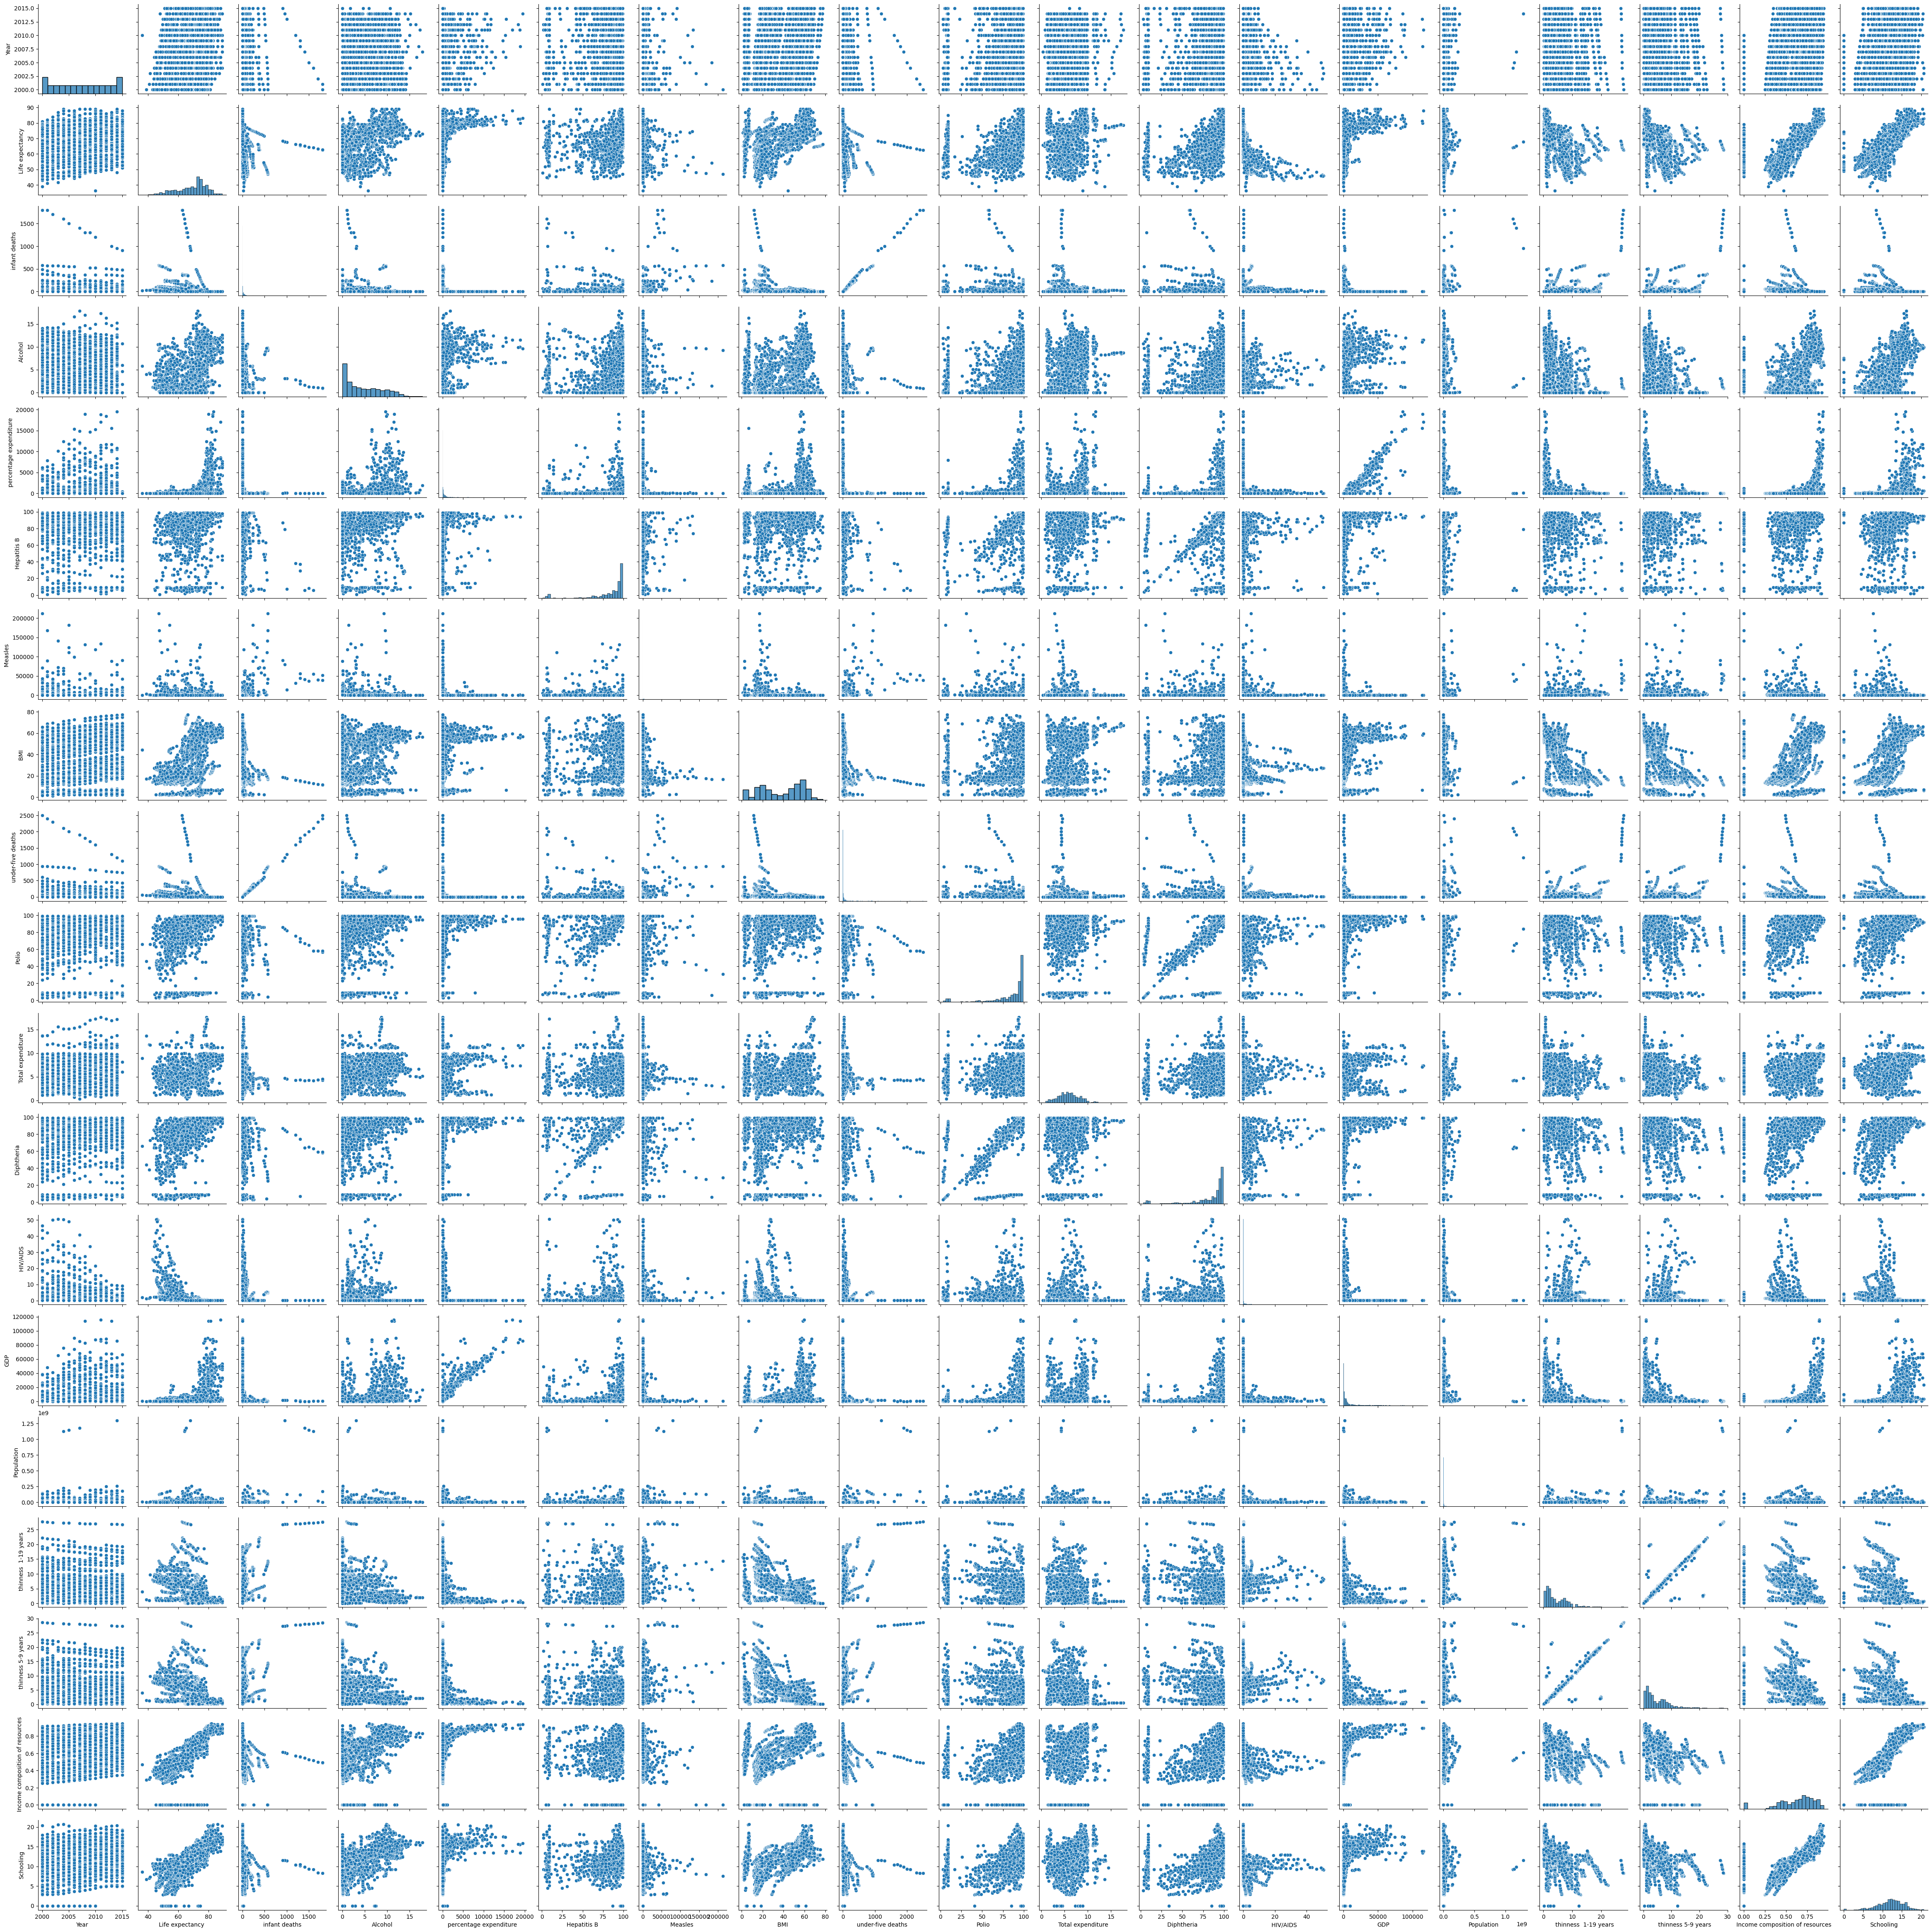

In [7]:
# 利用seaborn检查可视化数据之间的依赖关系
import seaborn as sns
sns.pairplot(train_data[column_name])


### 2.3 模型拟合和成年人死亡率预测

要求同学们利用训练数据来建立回归模型，我们已经给出了一个可运行的基础代码，同学们可以对此进行参考

In [8]:
train_data = pd.read_csv('./data/train_data.csv')
model_filename = './model.pkl'
imputer_filename = './imputer.pkl'
scaler_filename = './scaler.pkl'


In [9]:
def preprocess_data(data, imputer=None, scaler=None):

    column_name = ['Year', 'Life expectancy ', 'infant deaths', 'Alcohol',
               'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ',
               'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
               ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources',
               'Schooling']
    data = data.drop(["Country", "Status"], axis=1)

    if imputer==None:
        imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
        imputer = imputer.fit(data[column_name])
    data[column_name] = imputer.transform(data[column_name])

    if scaler==None:
        scaler = MinMaxScaler()
        scaler = scaler.fit(data)
    data_norm = pd.DataFrame(scaler.transform(data), columns=data.columns)

    data_norm = data_norm.drop(['Year'], axis = 1)

    return data_norm, imputer, scaler


In [10]:
def model_fit(train_data):

    train_y = train_data.iloc[:,-1].values
    train_data = train_data.drop(["Adult Mortality"], axis=1)
    train_data_norm, imputer, scaler = preprocess_data(train_data)

    train_x = train_data_norm.values

    regressor = LinearRegression()
    regressor.fit(train_x, train_y)

    joblib.dump(regressor, model_filename)
    joblib.dump(imputer, imputer_filename)
    joblib.dump(scaler, scaler_filename)

    return regressor


In [11]:
def predict(test_data, filename):
    loaded_model = joblib.load(model_filename)
    imputer = joblib.load(imputer_filename)
    scaler = joblib.load(scaler_filename)

    test_data_norm, _, _ = preprocess_data(test_data, imputer, scaler)
    test_x = test_data_norm.values
    predictions = loaded_model.predict(test_x)

    return predictions


In [12]:
model = model_fit(train_data)


In [13]:
# 打印模型的截距
print(model.intercept_)


435.23886796139277


In [14]:
# 打印模型的斜率
print(model.coef_)


[-4.84432876e+02  1.23837574e+03  4.20667968e+01 -3.52386083e+01
 -1.04985845e+01 -1.43780651e+02 -1.03481699e+01 -1.30509778e+03
  2.84217607e+00  2.46470013e+00  1.17854670e+01  1.76790506e+02
  2.76867194e+01  1.17439256e+01 -3.74969713e+01  3.57830107e+01
  1.10237824e+00  3.07238397e+01]


### 2.4 模型性能评估

我们可以看一下模型在训练集上的表现：

In [15]:
label = train_data.loc[:,'Adult Mortality']
data = train_data.iloc[:,:-1]
y_pred = predict(data, './model.pkl')
r2 = r2_score(label, y_pred)
mse = mean_squared_error(label, y_pred)
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))


MSE is 7451.44129449904
R2 score is 0.5207060487947698


## 3. 作业提交

**作业要求及注意事项**：    
             
1. 点击左侧栏提交作业后点击【生成文件】则需要勾选与预测 predict() 函数的 cell相关的其它cell ，并将其转化成为 main.py 文件。                       
2. 请导入必要的包和第三方库以及该模型所依赖的 py 文件 (包括此文件中曾经导入过的)。             
3. 请加载你认为训练最佳的模型，即请按要求填写模型路径。              
4. `predict()` 函数的输入输出及函数名称请不要改动。
5. 提交的作业包括【程序报告.pdf】和对应的ipynb文件

===========================================  **模型预测代码答题区域**  ===========================================  
在下方的代码块中编写 **模型预测** 部分的代码，请勿在别的位置作答

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib
import shutil
import os

# ==================== 数据预处理函数 ====================
train_data = pd.read_csv('./data/train_data.csv')

def preprocess_data(data, imputer=None, scaler=None):
    """
    预处理数据：填补缺失值并归一化数值型列。
    :param data: 待处理的数据
    :param imputer: 缺失值填补器（默认为None，使用均值填补）
    :param scaler: 归一化器（默认为None，使用MinMaxScaler）
    :return: 预处理后的数据、imputer 和 scaler
    """
    numeric_columns = [
        'Year', 'Life expectancy ', 'infant deaths', 'Alcohol',
        'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
        'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
        ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', 
        ' thinness 5-9 years', 'Income composition of resources', 'Schooling'
    ]

    # 删除无关列
    data = data.drop(["Country", "Status"], axis=1)
    
    # 填补缺失值
    if imputer is None:
        imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
        imputer.fit(data[numeric_columns])
    data[numeric_columns] = imputer.transform(data[numeric_columns])

    # 归一化处理
    if scaler is None:
        scaler = MinMaxScaler()
        scaler.fit(data[numeric_columns])
    data[numeric_columns] = scaler.transform(data[numeric_columns])

    # 删除非必要列
    data = data.drop(['Year'], axis=1)

    return pd.DataFrame(data, columns=data.columns), imputer, scaler

# ==================== 模型训练函数 ====================
def model_fit(train_data, model_type="linear"):
    """
    训练指定类型的回归模型并保存至 ./results 目录。
    :param train_data: 训练数据
    :param model_type: 模型类型（默认为线性回归）
    :return: 训练好的模型
    """
    train_y = train_data.iloc[:, -1].values
    train_data = train_data.drop(["Adult Mortality"], axis=1)
    train_data_norm, imputer, scaler = preprocess_data(train_data)
    train_x = train_data_norm.values

    if model_type == "linear":
        model = LinearRegression()
    elif model_type == "random_forest":
        model = RandomForestRegressor(n_estimators=200, random_state=42)
    elif model_type == "gradient_boosting":
        model = GradientBoostingRegressor(n_estimators=500, random_state=42)
    elif model_type == "xgboost":
        model = XGBRegressor(n_estimators=20, random_state=42)
    else:
        raise ValueError("未知模型类型")

    model.fit(train_x, train_y)

    # 创建结果目录并保存模型和预处理器
    os.makedirs('./results', exist_ok=True)
    joblib.dump(model, f"./results/{model_type}_model.pkl")
    joblib.dump(imputer, "./results/imputer.pkl")
    joblib.dump(scaler, "./results/scaler.pkl")

    return model

# ==================== 预测函数 ====================
def predict_model(test_data, model_type="linear"):
    """
    使用训练好的模型对测试数据进行预测。
    :param test_data: 测试数据
    :param model_type: 使用的模型类型
    :return: 预测结果
    """
    loaded_model = joblib.load(f"./results/{model_type}_model.pkl")
    imputer = joblib.load("./results/imputer.pkl")
    scaler = joblib.load("./results/scaler.pkl")

    test_data_norm, _, _ = preprocess_data(test_data, imputer, scaler)
    test_x = test_data_norm.values

    predictions_model = loaded_model.predict(test_x)

    return predictions_model

# ==================== 模型性能评估函数 ====================
def evaluate_model(train_data, model_type="linear"):
    """
    评估模型性能并打印结果。
    :param train_data: 训练数据
    :param model_type: 模型类型
    :return: 模型的 MSE 和 R2 分数
    """
    label = train_data['Adult Mortality']
    train_data = train_data.drop(columns=['Adult Mortality'])
    y_pred = predict_model(train_data, model_type)
    
    mse = mean_squared_error(label, y_pred)
    r2 = r2_score(label, y_pred)
    
    print(f"模型: {model_type}, MSE: {mse}, R2 Score: {r2}")
    
    return mse, r2

# ==================== 训练并选择最佳模型 ====================
best_model_type = None
best_score = float('-inf')

for model_type in ["linear", "random_forest", "gradient_boosting", "xgboost"]:
    model_fit(train_data, model_type)
    mse, r2 = evaluate_model(train_data, model_type)
    
    if r2 > best_score:
        best_score = r2
        best_model_type = model_type

# 复制最佳模型为 best_model.pkl
print(f"最佳模型: {best_model_type}，MSE: {best_score}, R2 Score: {r2}")
best_model_path = f"./results/{best_model_type}_model.pkl"
best_model_destination = "./results/best_model.pkl"
shutil.copy(best_model_path, best_model_destination)
print(f"最佳模型已保存至: {best_model_destination}")

'''
# ==================== 平台测试-预测函数 ====================
def predict(test_data):
    """
    使用训练好的模型对测试数据进行预测。
    :param test_data: 测试数据
    :param model_type: 使用的模型类型
    :return: 预测结果
    """
    loaded_model = joblib.load(f"./results/best_model.pkl")
    imputer = joblib.load("./results/imputer.pkl")
    scaler = joblib.load("./results/scaler.pkl")

    test_data_norm, _, _ = preprocess_data(test_data, imputer, scaler)
    test_x = test_data_norm.values

    predictions = loaded_model.predict(test_x)

    return predictions
'''